In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
dt = pd.read_csv("diabetes.csv")
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

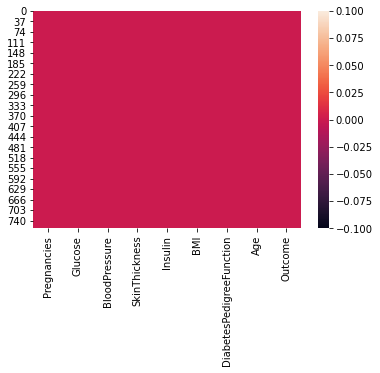

In [4]:
sns.heatmap(dt.isnull())

In [5]:
dt.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
dt[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI"]] =dt[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI"]].replace(0, np.NaN)

<AxesSubplot:>

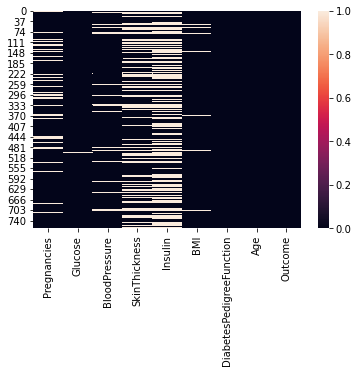

In [7]:
sns.heatmap(dt.isnull())

In [8]:
dt.fillna(dt.mean(), inplace = True)

<AxesSubplot:>

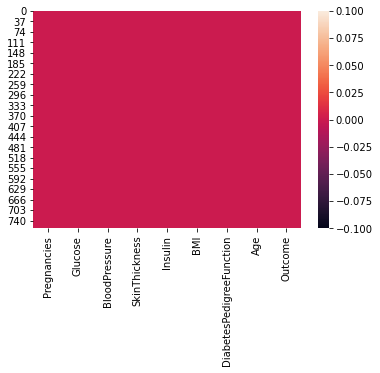

In [9]:
sns.heatmap(dt.isnull())

In [10]:
corr = dt.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

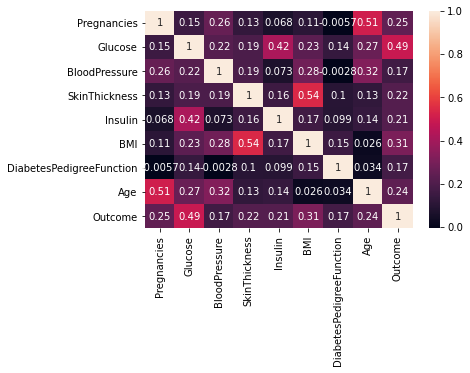

In [11]:
sns.heatmap(corr, annot=True)

## find the corr relation 

In [12]:
features_list = corr.nlargest(4, "Outcome").index
features_list

Index(['Outcome', 'Glucose', 'BMI', 'Pregnancies'], dtype='object')

In [13]:
features_corr = corr.nlargest(4,"Outcome").values[:,8]
features_corr

array([1.        , 0.49292767, 0.31192439, 0.24826293])

In [14]:
i =1 
for (feature , value) in zip(features_list, features_corr):
    print(f"{i}, {feature}, {value}")
    i+=1

1, Outcome, 1.0
2, Glucose, 0.4929276676125105
3, BMI, 0.31192438850062704
4, Pregnancies, 0.24826293112342326


### logistic method

In [15]:
x = dt[["Glucose", "BMI", "Pregnancies","Age"]]
y = dt["Outcome"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [22]:
x_test

,Glucose,BMI,Pregnancies,Age
766,126.0,30.1,1.000000,47
748,187.0,36.4,3.000000,36
42,106.0,22.7,7.000000,48
485,135.0,42.3,4.494673,24
543,84.0,39.5,4.000000,25
...,...,...,...,...
603,150.0,35.2,7.000000,54
510,84.0,29.7,12.000000,46
171,134.0,35.4,6.000000,29
672,68.0,35.5,10.000000,47


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
model = LogisticRegression()

In [25]:
logg_score = cross_val_score(model , x, y ,cv = 10, scoring = "accuracy").mean()
logg_score

0.7721804511278196

In [26]:
result = []

In [27]:
result.append(logg_score)

# knn method

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [29]:
folds= 10
cvscore = []

In [30]:
len(x)*((folds-1)/folds)

691.2

In [31]:
k_list = list(range(1,int(len(x)*((folds-1)/folds))))

In [32]:
k_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [33]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x , y, cv = folds, scoring = "accuracy").mean()
    cvscore.append(score)

In [34]:
knn_score = max(cvscore)

In [35]:
optimalk = k_list[cvscore.index(knn_score)]
optimalk

19

In [36]:
result.append(knn_score)

In [37]:
result

[0.7721804511278196, 0.774794941900205]

In [38]:
finalknn = KNeighborsClassifier(n_neighbors=19)
finalknn.fit(x,y)

KNeighborsClassifier(n_neighbors=19)

In [39]:
finalknn.predict([[100,30,45,60]])

array([0], dtype=int64)

In [40]:
import pickle

In [41]:
pickle.dump(finalknn, open("diabetes.sav" , "wb"))

In [43]:
loaded_model = pickle.load(open("diabetes.sav", "rb"))
loaded_model

KNeighborsClassifier(n_neighbors=19)

In [44]:
loaded_model.predict([[100,30,45,30]])

array([1], dtype=int64)